In [1]:
from sklearn.datasets import load_iris
import pandas as pd

## Задача 1

Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.
Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).
Визуализировать распределения классов на всех парах переменных.

In [2]:
iris_data = load_iris()

iris = pd.DataFrame(
    {
        "sepal_length": iris_data["data"][:, 0],
        "sepal_width": iris_data["data"][:, 1],
        "petal_length": iris_data["data"][:, 2],
        "petal_width": iris_data["data"][:, 3],
        "species": iris_data["target"]
    }
)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [4]:
iris.groupby("species")[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                   
0       sepal_length      1.000000     0.742547      0.267176     0.278098
        sepal_width       0.742547     1.000000      0.177700     0.232752
        petal_length      0.267176     0.177700      1.000000     0.331630
        petal_width       0.278098     0.232752      0.331630     1.000000
1       sepal_length      1.000000     0.525911      0.754049     0.546461
        sepal_width       0.525911     1.000000      0.560522     0.663999
        petal_length      0.754049     0.560522      1.000000     0.786668
        petal_width       0.546461     0.663999      0.786668     1.000000
2       sepal_length      1.000000     0.457228      0.864225     0.281108
        sepal_width       0.457228     1.000000      0.401045     0.537728
        petal_length      0.864225     0.401045      1.000000     0.322108
        petal_width       0.281108     0.537728      0.322108     1.000000

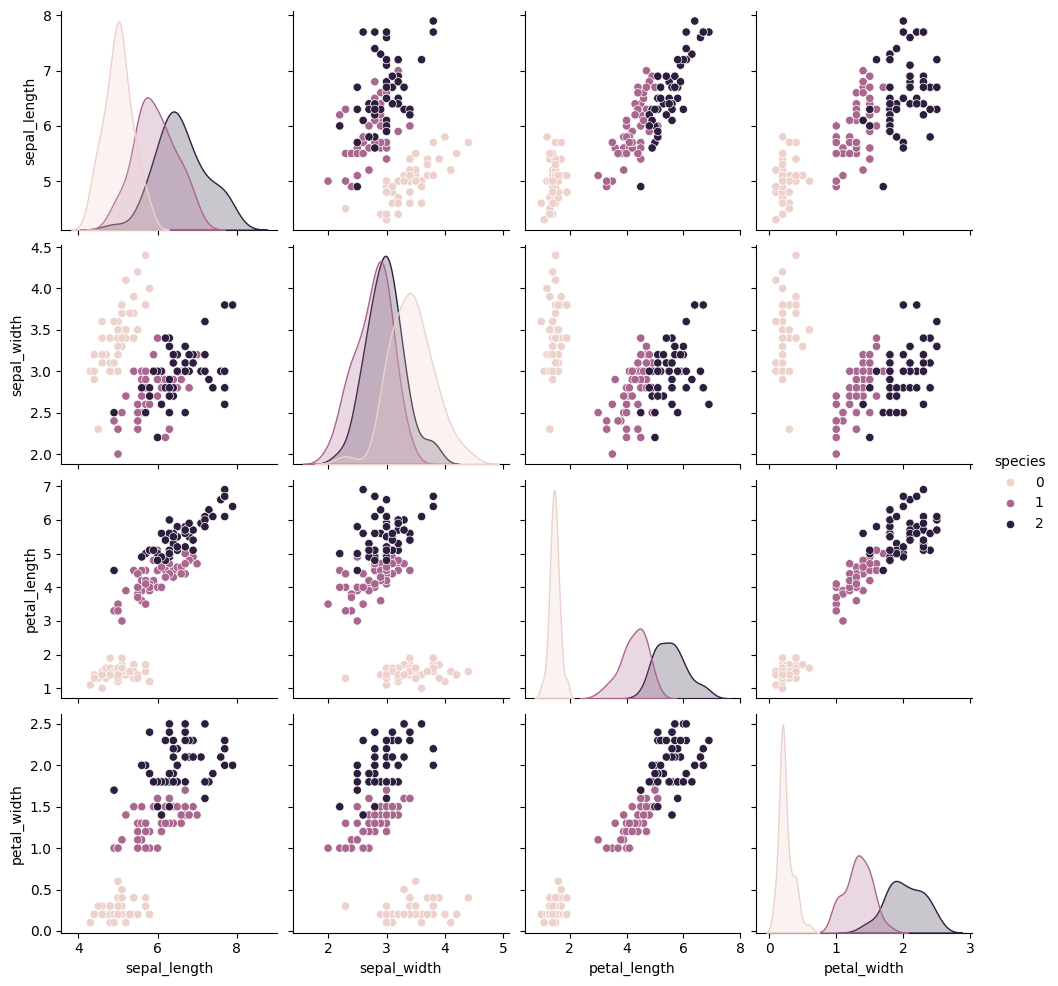

In [5]:
import seaborn as sns
sns.pairplot(iris, hue="species")

# Задача 2

Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

In [6]:
variables = ["petal_length", "petal_width"]

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = [
    ("Linear discriminant", LinearDiscriminantAnalysis()),
    ("Quadrant discriminint", QuadraticDiscriminantAnalysis()),
    ("Logistic regression", LogisticRegression()),
    ("Support vector machine linear kernel", SVC(kernel="linear")),
    ("Support vector machine quadratic kernel", SVC(kernel="poly", degree=2))
]

In [8]:
import numpy as np

x_min = iris["petal_length"].min()
x_max = iris["petal_length"].max()

y_min = iris["petal_width"].min()
y_max = iris["petal_width"].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

C:\Users\Ivans\AppData\Local\Temp\ipykernel_5812\480168541.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


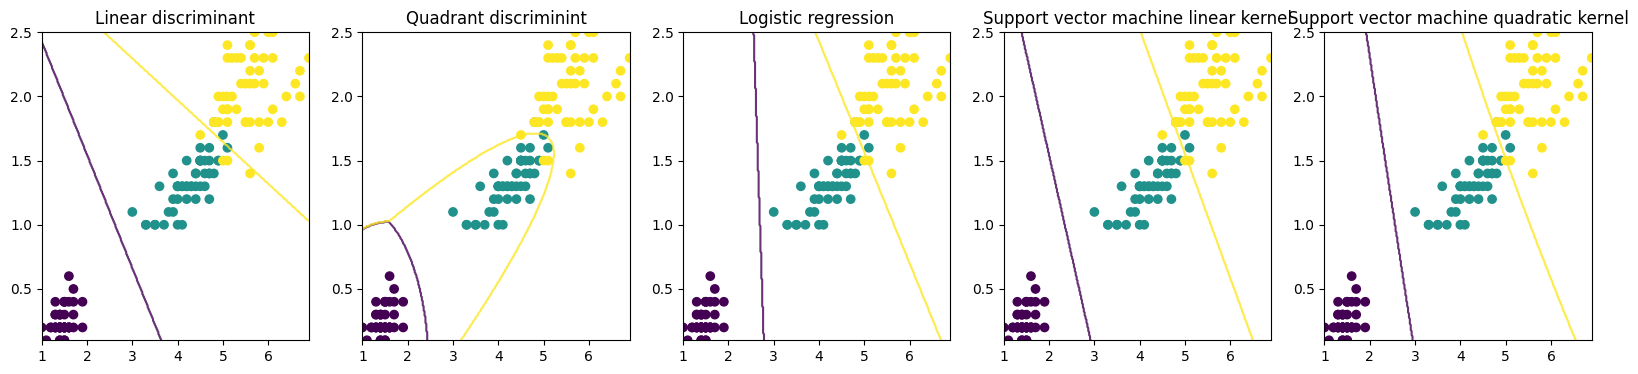

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(models), figsize=(20, 4))


for ax, (name, model) in zip(axes, models):
    model.fit(iris[variables].to_numpy(), iris["species"].to_numpy())
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    ax.contour(xx, yy, preds, alpha=0.8, levels=[0.5, 1.5])
    ax.scatter(iris["petal_length"], iris["petal_width"], c=iris["species"])
    ax.set_title(name)

fig.show()  

## Задача 3

Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) на обучающей выборке и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

Наименнее разделимы классы 1 и 2, то есть versicolor и 'virginica'

In [10]:
iris_3 = iris[iris["species"] != 0]

In [11]:
model = LinearDiscriminantAnalysis().fit(
    iris_3.drop("species", axis=1),
    iris_3["species"]
)

preds = model.predict(iris_3.drop("species", axis=1))

In [12]:
variables = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
pairs = [(v1, v2) for v1 in variables for v2 in variables]

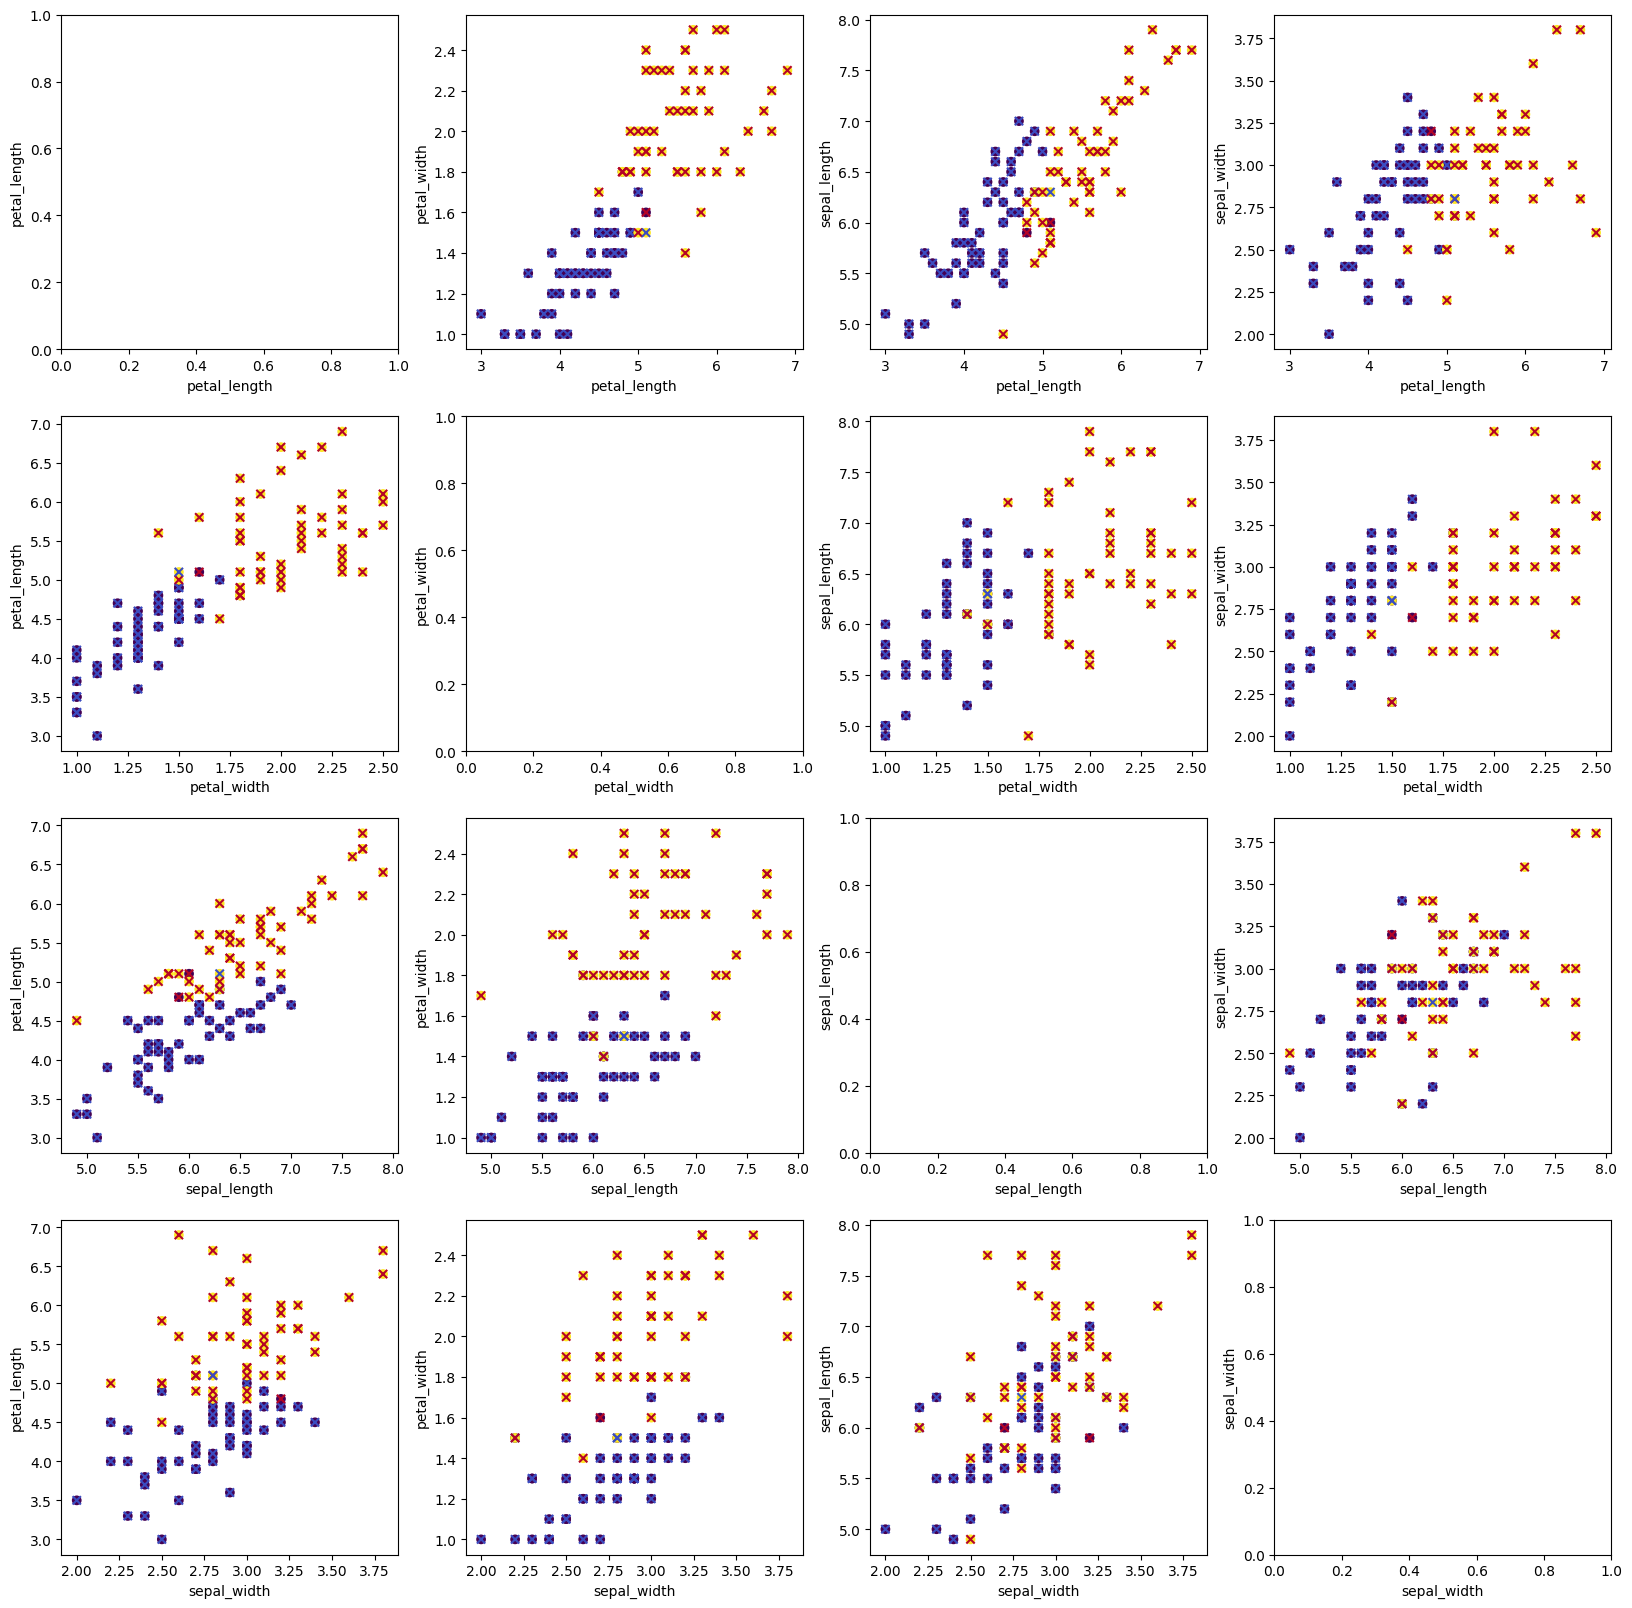

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

preds = model.predict(iris_3.drop("species", axis=1))

for ax, (f1, f2) in zip(axes.ravel(), pairs):
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    if f1 == f2:
        continue
    ax.scatter(iris_3[f1], iris_3[f2], c=iris_3["species"], cmap='viridis')
    ax.scatter(iris_3[f1], iris_3[f2], c=preds, cmap='coolwarm', marker='x')

## Задача 4

 На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

In [14]:
class QDA():
    def fit(self, X, y):
        self.classes_ = np.unique(y)

        self.means_ = {}
        self.covs_ = {}
        self.priors_ = {}

        for c in self.classes_:
            Xc = X[y == c]
            self.means_[c] = Xc.mean(axis=0)
            self.covs_[c] = np.cov(Xc, rowvar=False)
            self.priors_[c] = len(Xc) / len(X)
        
        return self
    
    def _discriminant(self, x, c):
        return (-0.5 * np.log(np.linalg.det(self.covs_[c])) 
                - 0.5 * (x - self.means_[c]).T @ np.linalg.inv(self.covs_[c]) @ (x - self.means_[c])
                + np.log(self.priors_[c]))
    
    def predict(self, X):
        return np.array([
            max(self.classes_, key=lambda c: self._discriminant(x, c))
            for x in X
        ])

In [15]:
variables = ["petal_length", "petal_width"]

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = [
    ("My QDA", QDA()),
    ("Quadrant discriminint", QuadraticDiscriminantAnalysis())
]

In [17]:
import numpy as np

x_min = iris["petal_length"].min()
x_max = iris["petal_length"].max()

y_min = iris["petal_width"].min()
y_max = iris["petal_width"].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

C:\Users\Ivans\AppData\Local\Temp\ipykernel_5812\480168541.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


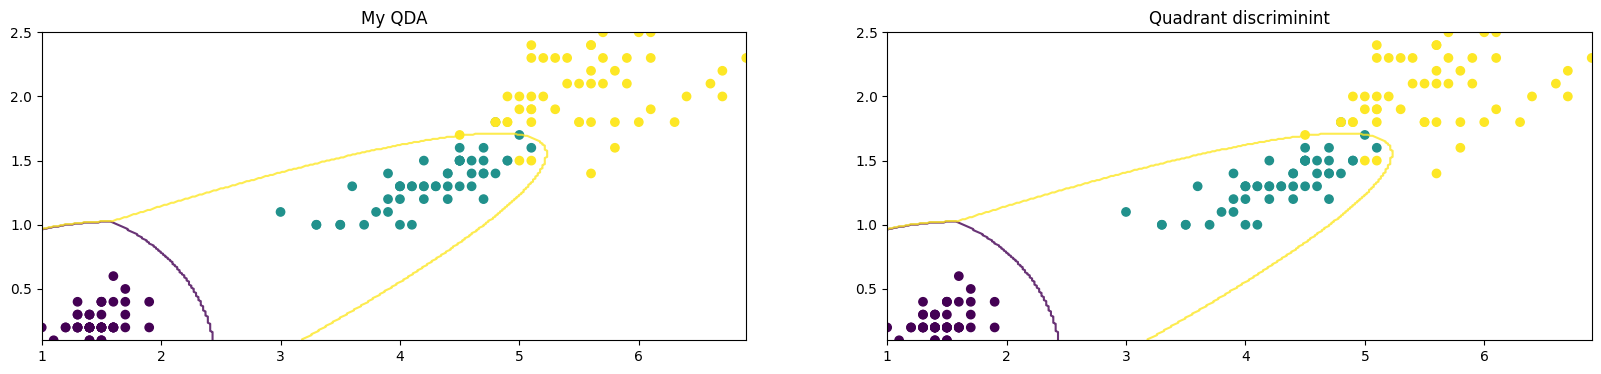

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(models), figsize=(20, 4))


for ax, (name, model) in zip(axes, models):
    model.fit(iris[variables].to_numpy(), iris["species"].to_numpy())
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    ax.contour(xx, yy, preds, alpha=0.8, levels=[0.5, 1.5])
    ax.scatter(iris["petal_length"], iris["petal_width"], c=iris["species"])
    ax.set_title(name)

fig.show()  